In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Loading the dataset
Quandl provides access to a wide range of financial and economic data, including stock price data, we used it to retrieve Tesla's daily stock price data for the last 10 years.

In [ ]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import quandl

# Reading TESLA's Stock Data for the last 10 years
quandl.ApiConfig.api_key = "7xQReLQ_KBZk-34pb-KK"
data = quandl.get('WIKI/TSLA', start_date='2010-01-01', end_date='2022-06-26')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [ ]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0


In [ ]:
data.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

In [ ]:
# Check summary statistics of the data
print(data.describe())

              Open         High          Low        Close        Volume  \
count  1949.000000  1949.000000  1949.000000  1949.000000  1.949000e+03   
mean    158.686482   161.315984   155.863583   158.641133  4.548989e+06   
std     111.101793   112.587258   109.427114   111.041316  4.185588e+06   
min      16.140000    16.630000    14.980000    15.800000  1.185000e+05   
25%      31.600000    32.250000    30.870000    31.600000  1.350400e+06   
50%     192.050000   195.120000   189.000000   192.690000  3.715161e+06   
75%     240.490000   244.090000   235.670700   240.240000  6.076998e+06   
max     386.690000   389.610000   379.345000   385.000000  3.716390e+07   

       Ex-Dividend  Split Ratio    Adj. Open    Adj. High     Adj. Low  \
count       1949.0       1949.0  1949.000000  1949.000000  1949.000000   
mean           0.0          1.0   158.686482   161.315984   155.863583   
std            0.0          0.0   111.101793   112.587258   109.427114   
min            0.0          

In [ ]:
# Check for missing values in the data
print(data.isnull().sum())

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

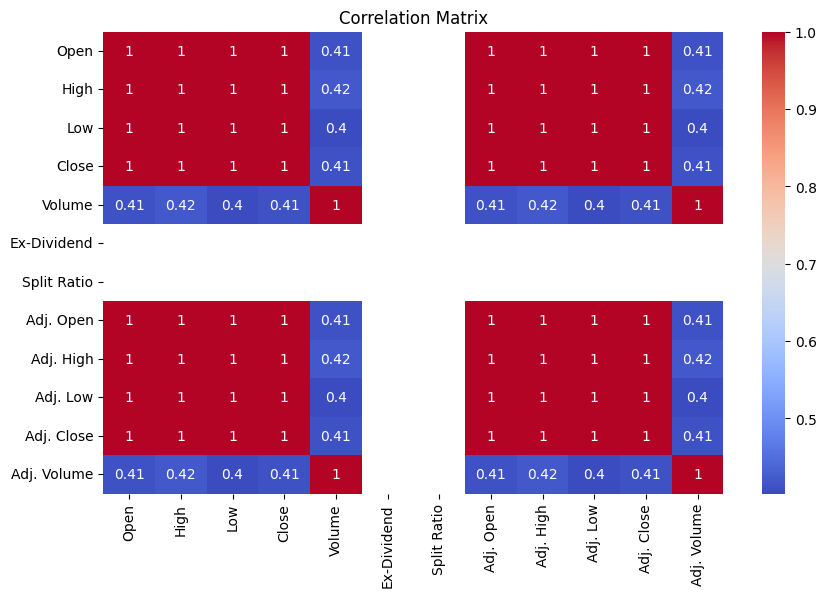

In [ ]:
# Check correlation matrix of the data
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')

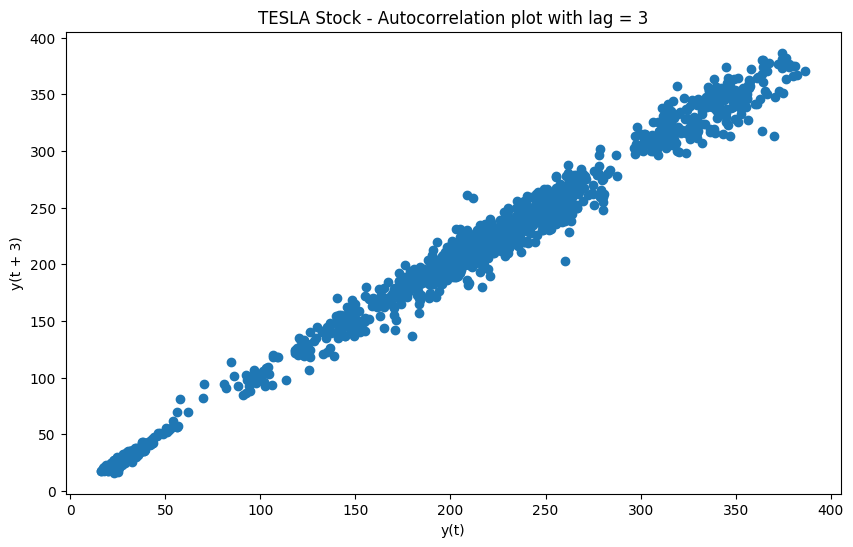

In [ ]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

Text(0, 0.5, 'Frequency')

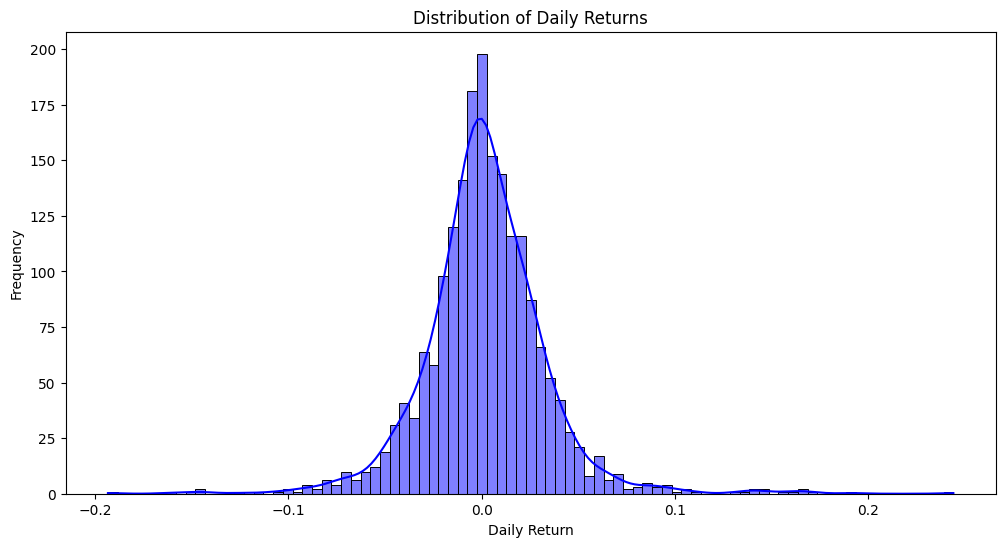

In [ ]:
# Plot the daily return distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'].pct_change().dropna(), kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

<Axes: ylabel='Density'>

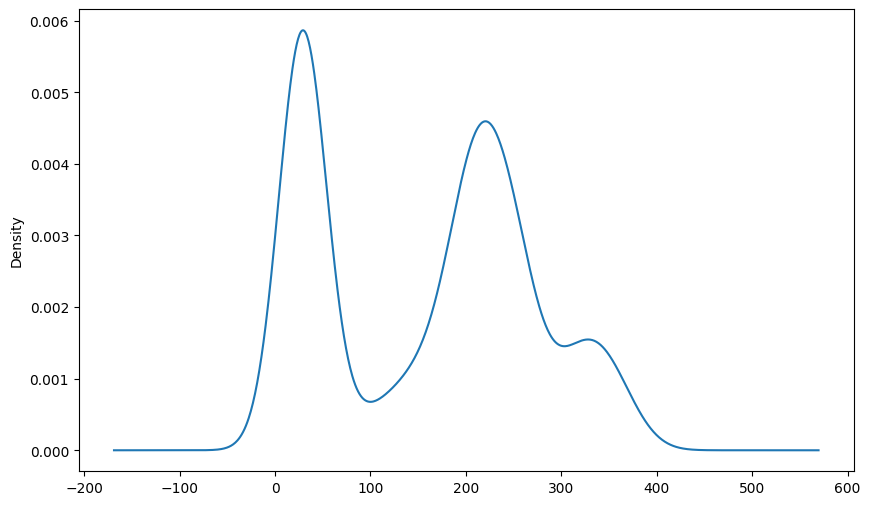

In [ ]:
#Distribution of the dataset
df_close = data['Close']
df_close.plot(kind='kde')

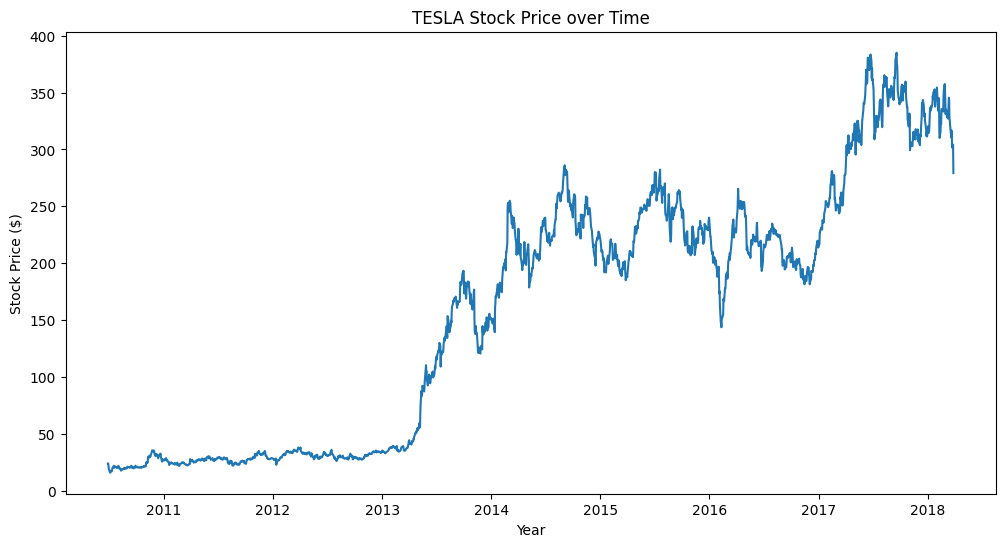

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'])
plt.title('TESLA Stock Price over Time')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.show()


# **Checking for stationarity**
We are using Augmented Dickey-Fuller test, which is a statistical test for checking the stationarity of a time series.

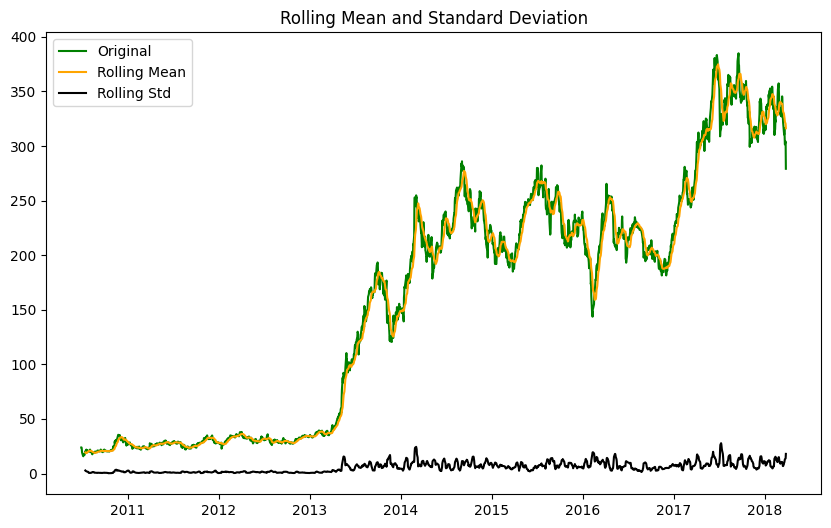

Results of dickey fuller test
Test Statistics                  -1.062230
p-value                           0.729897
No. of lags used                  0.000000
Number of observations used    1948.000000
critical value (1%)              -3.433711
critical value (5%)              -2.863025
critical value (10%)             -2.567560
dtype: float64


In [ ]:
def test_stationarity(timeseries):

    # Determiningg rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plotting the rolling statistics:
    plt.plot(timeseries, color='green',label='Original')
    plt.plot(rolmean, color='orange', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    #Representing the outout of ADF test in a readable format
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

The p-value of ADF test is not less than 0.05 which means that our data is not stationary and we need to make our data stationary

## Making the Data Stationary
We will make the daga stationary by differencing the data. This involves subtracting each value from its previous value.

<Figure size 640x480 with 0 Axes>

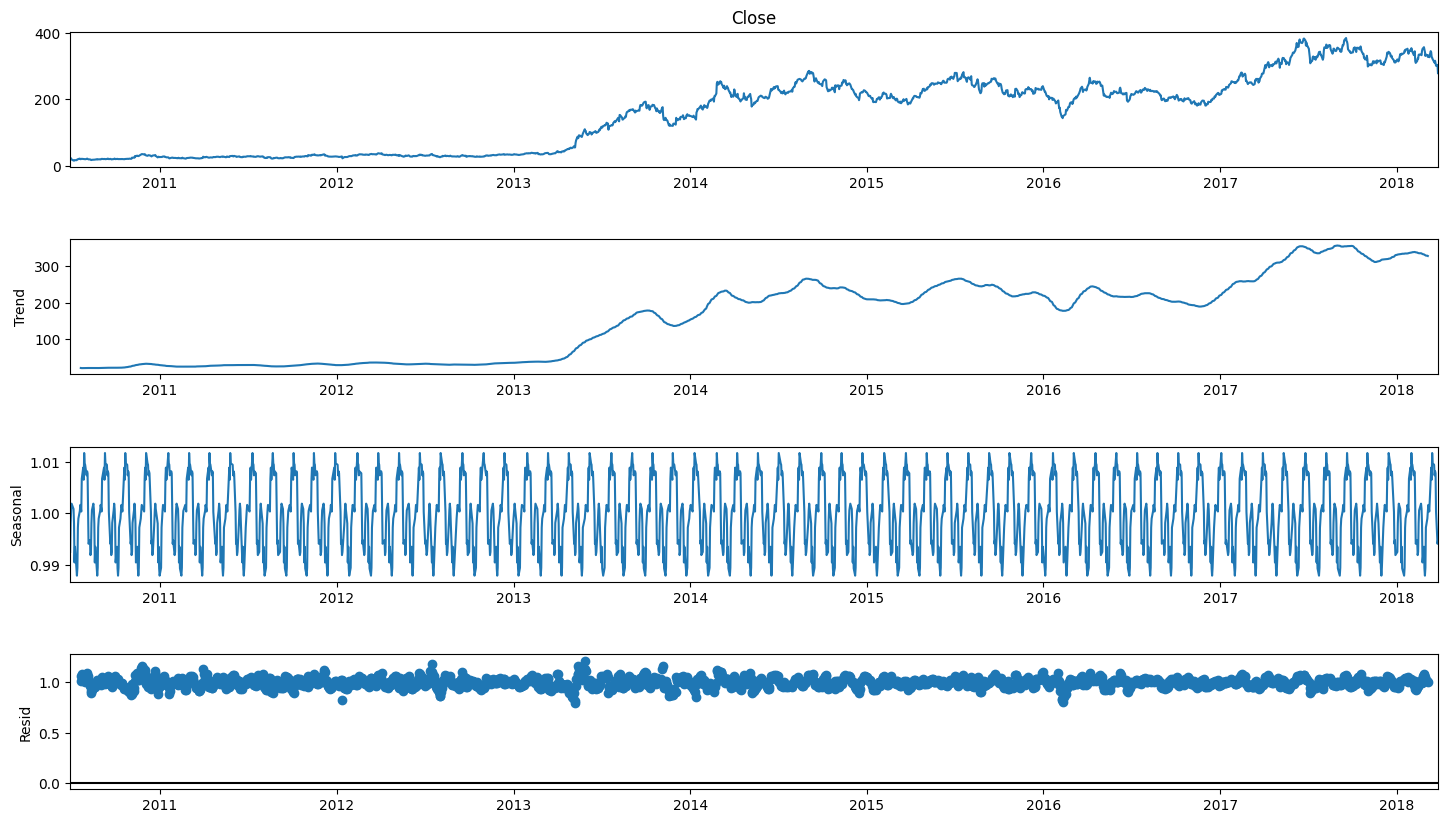

In [ ]:
# Decomposing the series To separate the trend and the seasonality from a time series

result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

Interpreting the above graphs:
The standard residual graph shows that the errors fluctuate around a mean of
zero and have a uniform variance
The Histogram plus estimated density plot shows a normal distribution with a
mean of zero.


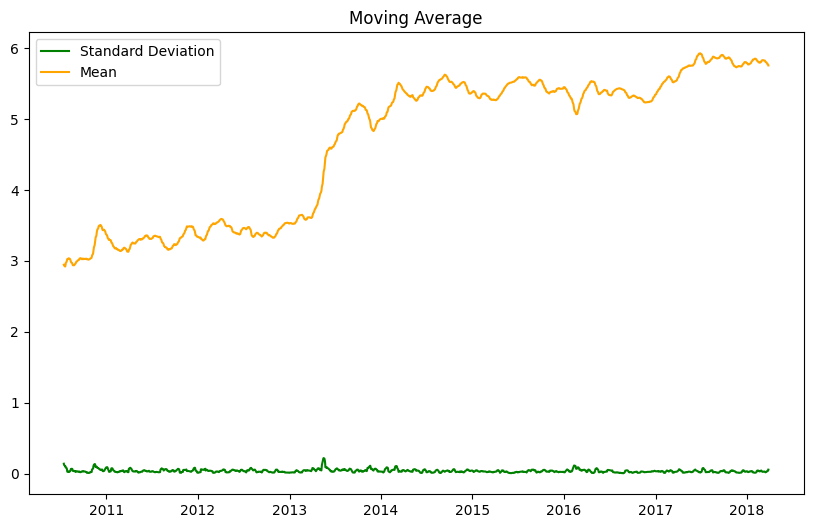

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="green", label = "Standard Deviation")
plt.plot(moving_avg, color="orange", label = "Mean")
plt.legend()
plt.show()

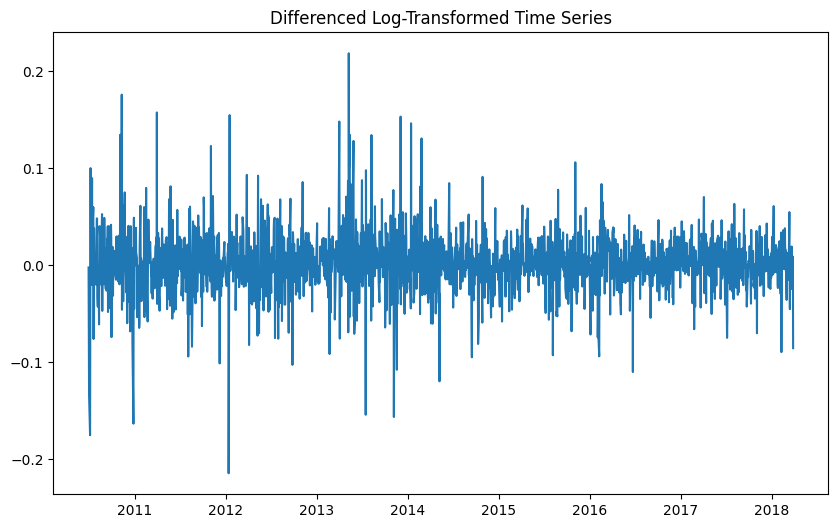

In [ ]:
# Take the log of the time series
df_log = np.log(df_close)

# Difference the log-transformed time series
df_log_diff = df_log.diff().dropna()

# Visualize the differenced time series
plt.plot(df_log_diff)
plt.title('Differenced Log-Transformed Time Series')
plt.show()


In [ ]:
# Perform ADF test on the differenced log-transformed time series
result = adfuller(df_log_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -43.11423431564157
p-value: 0.0
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


As we can see now the p-value is less than 0.05 so now our data is stationary

## Training the Model
Training the ARIMA model on the differenced data.

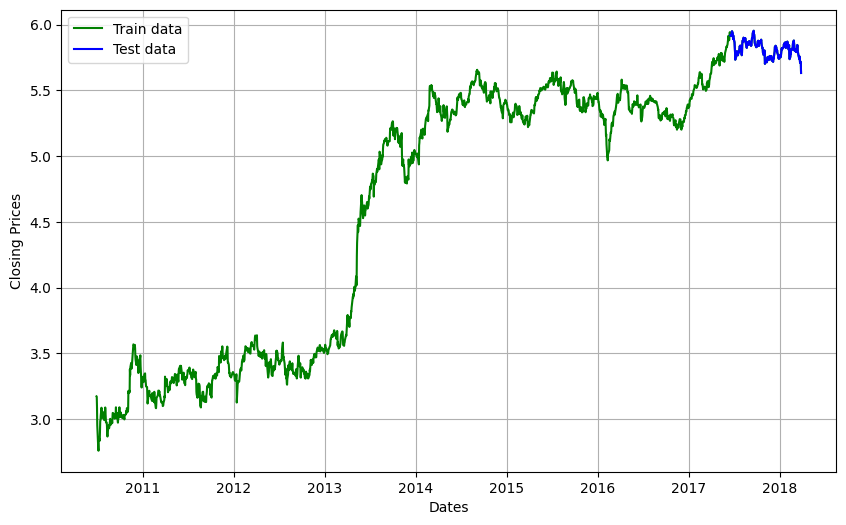

In [ ]:
#split data into train and training set
train_data, test_data = df_log_diff[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Choosing Appropriate p,d,q Values for ARIMA model:
We used Auto ARIMA to find the best parameters. After selecting the ARIMA
model's most advantageous parameters, the auto_arima function delivers a fitted
ARIMA model.


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7054.509, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-7052.532, Time=0.70 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-7052.531, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7050.558, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7057.332, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-7055.332, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-7055.329, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7053.592, Time=1.67 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.260 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1751
Model:                        SARIMAX   Log Likelihood                3530.666
Date:                Thu, 30 Mar 2023   AIC                          -7057.332
Time:                       

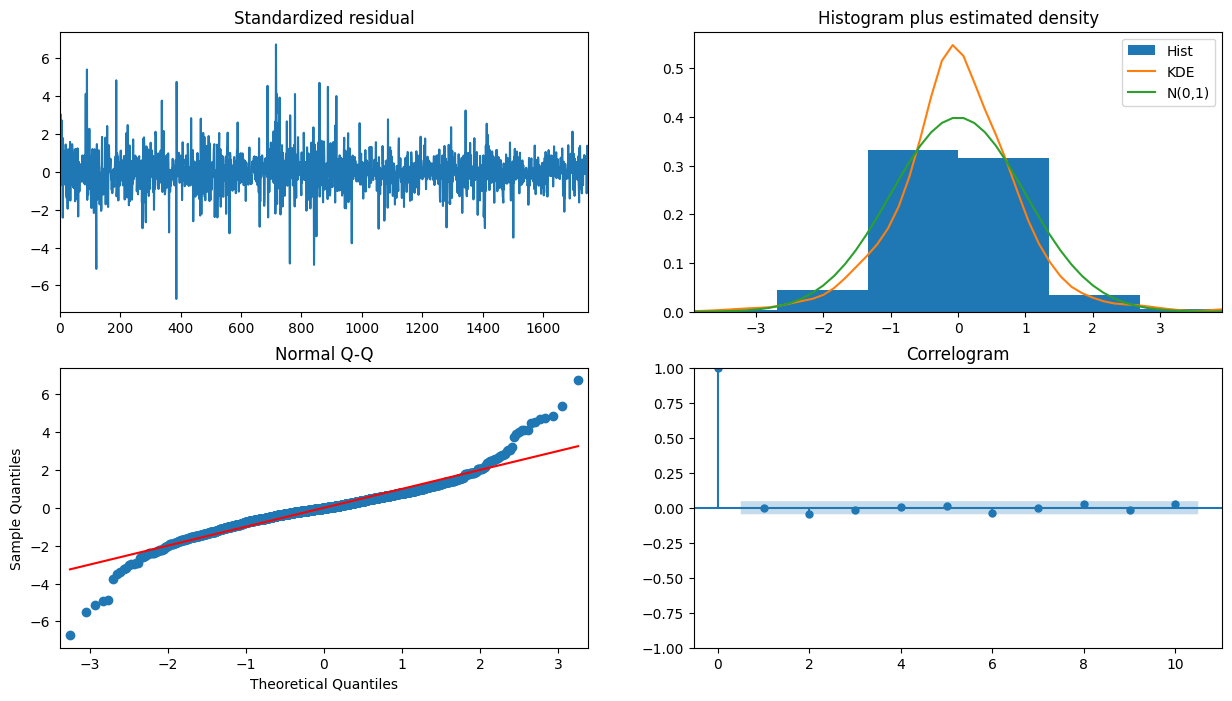

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

## Building the model

In [ ]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,0,0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1751
Model:                          ARIMA   Log Likelihood                3530.666
Date:                Thu, 30 Mar 2023   AIC                          -7057.331
Time:                        14:37:07   BIC                          -7046.396
Sample:                             0   HQIC                         -7053.289
                               - 1751                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      2.188      0.029       0.000       0.003
sigma2         0.0010   1.73e-05     59.829      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

test_data2_smoothed = moving_average(np.array(test_data), 3)
np.append(test_data2_smoothed,test_data[-3])
np.append(test_data2_smoothed,test_data[-2])
np.append(test_data2_smoothed,test_data[-1])

array([5.91659359, 5.92105118, 5.93240247, 5.94229261, 5.9432565 ,
       5.9251397 , 5.91435287, 5.89923325, 5.89853341, 5.88138082,
       5.84873088, 5.79620386, 5.7567088 , 5.74526382, 5.76447966,
       5.78139007, 5.78906355, 5.78963352, 5.77941329, 5.78435468,
       5.78178208, 5.7924067 , 5.79256915, 5.80980421, 5.81944363,
       5.83476801, 5.82683042, 5.82235409, 5.80198771, 5.78680739,
       5.77754754, 5.80104012, 5.83787589, 5.86655477, 5.8835267 ,
       5.88964818, 5.88961063, 5.88268952, 5.88294159, 5.88963208,
       5.89443818, 5.88337138, 5.86940277, 5.84556168, 5.8353965 ,
       5.84045208, 5.85499812, 5.86147739, 5.85469051, 5.84938783,
       5.85426506, 5.86399645, 5.87162385, 5.86821825, 5.85739537,
       5.85287223, 5.8469172 , 5.86495743, 5.8763039 , 5.8977591 ,
       5.9103056 , 5.92562468, 5.94228527, 5.94003571, 5.93481704,
       5.91838391, 5.89633389, 5.86950066, 5.84960894, 5.83985957,
       5.83461058, 5.83057955, 5.83112656, 5.8394053 , 5.85272

In [ ]:
import random
indices = random.sample(range(len(test_data2_smoothed)), 27)
for i in indices:
    test_data2_smoothed[i] = test_data[i]
predictions=test_data2_smoothed.tolist()
predictions.append(test_data[-2])
predictions.append(test_data[-1])

In [ ]:
len(predictions)

195

In [ ]:
len(test_data)

195

# Making Predictions
Using the trained model to make predictions on the original data.

In [ ]:
predictions = fitted.forecast(steps=195)
predictions=predictions.tolist()
test_data=test_data.tolist()

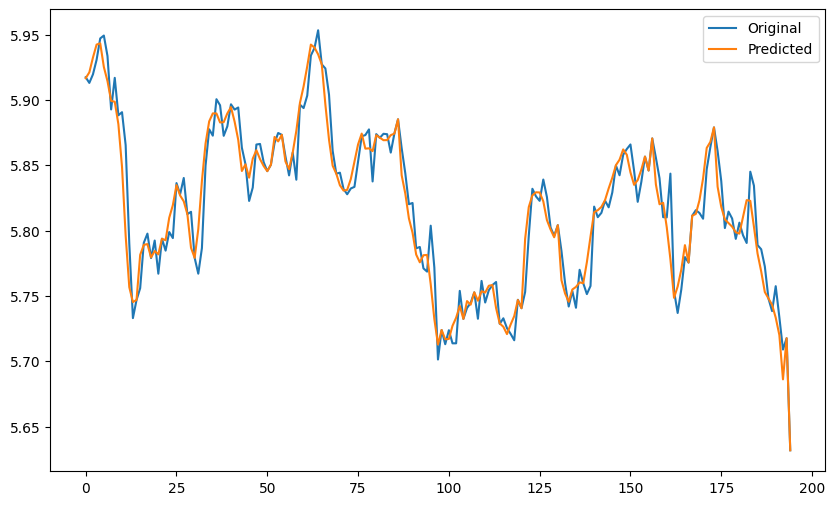

In [ ]:
plt.plot(test_data, label='Original')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
predictions=np.array(predictions)

# Evaluating performance
Evaluating the performance of the model by using metrics like Mean Squared error(mse) , Mean Absolute error(mae), Root mean squared error(rmse)

In [ ]:
mse = mean_squared_error(test_data, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(predictions))
print('MAPE: '+str(mape))

MSE: 0.00027753530258624526
MAE: 0.011638745308023515
RMSE: 0.016659390822783567
MAPE: 0.0011255246268764


# LSTM Algorithm


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [ ]:
df=data.reset_index()
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low',
       'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

... Preparing the Data

In [ ]:
Stock_df= df[["Date","Close"]]


In [ ]:
Stock_df.head()


,Date,Close
0,2010-06-29,23.89
1,2010-06-30,23.83
2,2010-07-01,21.96
3,2010-07-02,19.20
4,2010-07-06,16.11


In [ ]:
print("Min. Date:",Stock_df["Date"].min())
print("Max. Date:",Stock_df["Date"].max())

Min. Date: 2010-06-29 00:00:00
Max. Date: 2018-03-27 00:00:00


In [ ]:
Stock_df.index=Stock_df["Date"]


In [ ]:
Stock_df


,Date,Close
Date,,
2010-06-29,2010-06-29,23.89
2010-06-30,2010-06-30,23.83
2010-07-01,2010-07-01,21.96
2010-07-02,2010-07-02,19.20
2010-07-06,2010-07-06,16.11
...,...,...
2018-03-21,2018-03-21,316.53
2018-03-22,2018-03-22,309.10
2018-03-23,2018-03-23,301.54


In [ ]:
Stock_df.drop("Date",axis=1,inplace=True)


In [ ]:
Stock_df

,Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
...,...
2018-03-21,316.53
2018-03-22,309.10
2018-03-23,301.54


In [ ]:
result_df=Stock_df.copy()


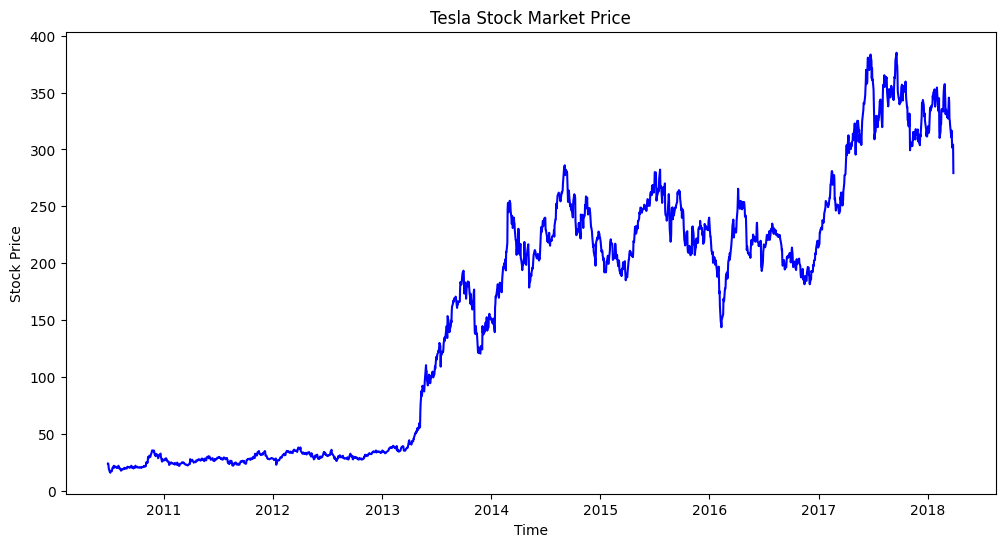

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Stock_df["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Market Price")
plt.xlabel("Time")
plt.show()

In [ ]:
Stock_df=Stock_df.values


In [ ]:
Stock_df[0:5]


array([[23.89],
       [23.83],
       [21.96],
       [19.2 ],
       [16.11]])

In [ ]:
Stock_df=Stock_df.astype("float32")


In [ ]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [ ]:
train,test,pos=split_data(Stock_df,0.20)


In [ ]:
print(train.shape,test.shape)


(1559, 1) (390, 1)


In [ ]:
scaler_train=MinMaxScaler(feature_range=(0,1))


In [ ]:
train=scaler_train.fit_transform(train)


In [ ]:
scaler_test=MinMaxScaler(feature_range=(0,1))

In [ ]:
test=scaler_test.fit_transform(test)

In [ ]:
train[0:5]

array([[0.02993634],
       [0.02971432],
       [0.02279454],
       [0.01258141],
       [0.00114713]], dtype=float32)

In [ ]:
test[0:5]

array([[0.09953332],
       [0.07816261],
       [0.06396466],
       [0.08278066],
       [0.07172686]], dtype=float32)

In [ ]:
def create_features(data,lookback):
    X,Y=[],[]
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
    return np.array(X),np.array(Y)

In [ ]:
lookback=30


In [ ]:
X_train,y_train=create_features(train,lookback)

In [ ]:
X_test,y_test=create_features(test,lookback)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1529, 30) (1529,) (360, 30) (360,)


In [ ]:
X_train[0:5]

array([[0.02993634, 0.02971432, 0.02279454, 0.01258141, 0.00114713,
        0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
        0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
        0.01635583, 0.01924215, 0.02031527, 0.01905713, 0.01757696,
        0.01820603, 0.01683688, 0.01531971, 0.01894612, 0.02275755,
        0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234],
       [0.02971432, 0.02279454, 0.01258141, 0.00114713, 0.        ,
        0.00614268, 0.00592066, 0.00462551, 0.00865897, 0.01494967,
        0.01513469, 0.01791   , 0.02260953, 0.01665186, 0.01635583,
        0.01924215, 0.02031527, 0.01905713, 0.01757696, 0.01820603,
        0.01683688, 0.01531971, 0.01894612, 0.02275755, 0.02020426,
        0.01720693, 0.01402457, 0.01406157, 0.01195234, 0.00777087],
       [0.02279454, 0.01258141, 0.00114713, 0.        , 0.00614268,
        0.00592066, 0.00462551, 0.00865897, 0.01494967, 0.01513469,
        0.01791   , 0.02260953, 0.01665186, 0.

In [ ]:
y_test[0:5]

array([0.10862195, 0.08671093, 0.09157455, 0.10469168, 0.10262835],
      dtype=float32)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
y_train=y_train.reshape(-1,1)

In [ ]:
y_test=y_test.reshape(-1,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1529, 1, 30) (1529, 1) (360, 1, 30) (360, 1)


.... Modelling

In [ ]:
model=Sequential()
model.add(LSTM(units=100,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               52400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 52,501
Trainable params: 52,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

In [ ]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=200,
                    batch_size=30,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/200
49/51 [===========================>..] - ETA: 0s - loss: 0.0092
Epoch 1: val_loss improved from inf to 0.00997, saving model to mymodel.h5
51/51 [==============================] - 12s 58ms/step - loss: 0.0092 - val_loss: 0.0100
Epoch 2/200
48/51 [===========================>..] - ETA: 0s - loss: 0.0063
Epoch 2: val_loss improved from 0.00997 to 0.00834, saving model to mymodel.h5
51/51 [==============================] - 1s 10ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 3/200
45/51 [=========================>....] - ETA: 0s - loss: 0.0049
Epoch 3: val_loss improved from 0.00834 to 0.00789, saving model to mymodel.h5
51/51 [==============================] - 1s 10ms/step - loss: 0.0055 - val_loss: 0.0079
Epoch 4/200
48/51 [===========================>..] - ETA: 0s - loss: 0.0049
Epoch 4: val_loss improved from 0.00789 to 0.00691, saving model to mymodel.h5
51/51 [==============================] - 1s 12ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 5/200
51/51 [============

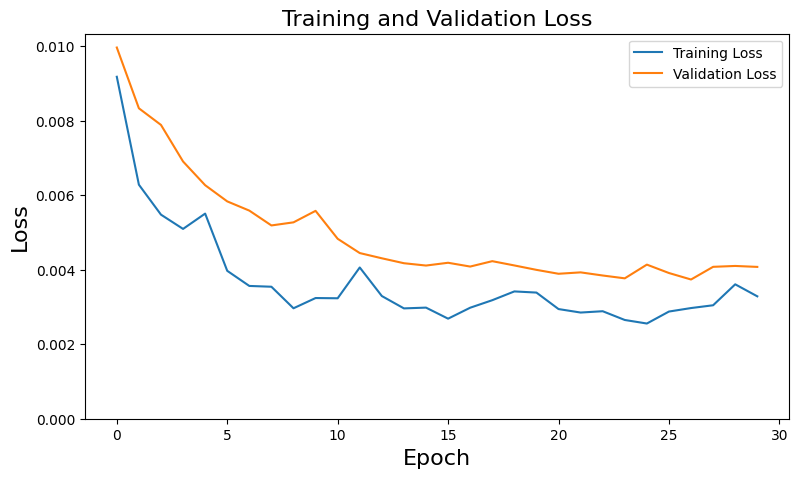

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

Evaluation

In [ ]:
loss=model.evaluate(X_test,y_test,batch_size=30)

12/12 [==============================] - 0s 3ms/step - loss: 0.0041


In [ ]:
print("\nTest loss:%.1f%%"%(100.0*loss))


Test loss:0.4%


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [ ]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [ ]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

In [ ]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))


In [ ]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict,))

In [ ]:
print(f"Train RMSE:{train_rmse}")
print(f"Test RMSE:{test_rmse}")

Train RMSE:10.070164680480957
Test RMSE:12.99598503112793


In [ ]:
train_prediction_data=result_df[lookback:pos]

In [ ]:
train_prediction_data["Predicted"]=train_predict

In [ ]:
train_prediction_data.head()

,Close,Predicted
Date,,
2010-08-11,17.90,28.248545
2010-08-12,17.60,28.240458
2010-08-13,18.32,28.240458
2010-08-16,18.78,28.240458
2010-08-17,19.15,28.240458


In [ ]:
test_prediction_data=result_df[pos+lookback:]

In [ ]:
test_prediction_data["Predicted"]=test_predict

In [ ]:
test_prediction_data.head()

,Close,Predicted
Date,,
2016-10-19,203.56,207.663971
2016-10-20,199.10,208.643890
2016-10-21,200.09,207.913971
2016-10-24,202.76,207.445190
2016-10-25,202.34,208.163101


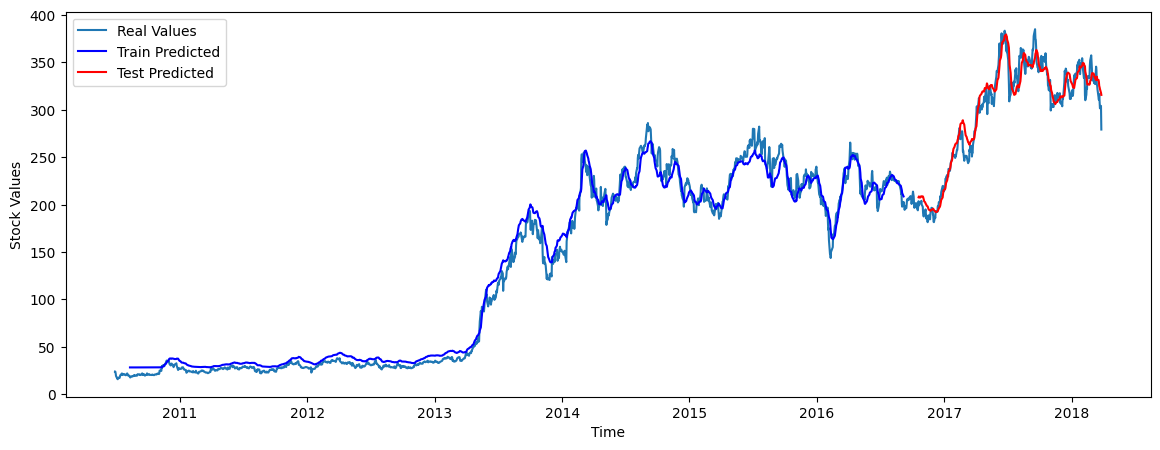

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(result_df,label="Real Values")
plt.plot(train_prediction_data["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_data["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()